In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [3]:
!unzip "/content/drive/MyDrive/Data Dynamos/Copy of Copy of archive (4).zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

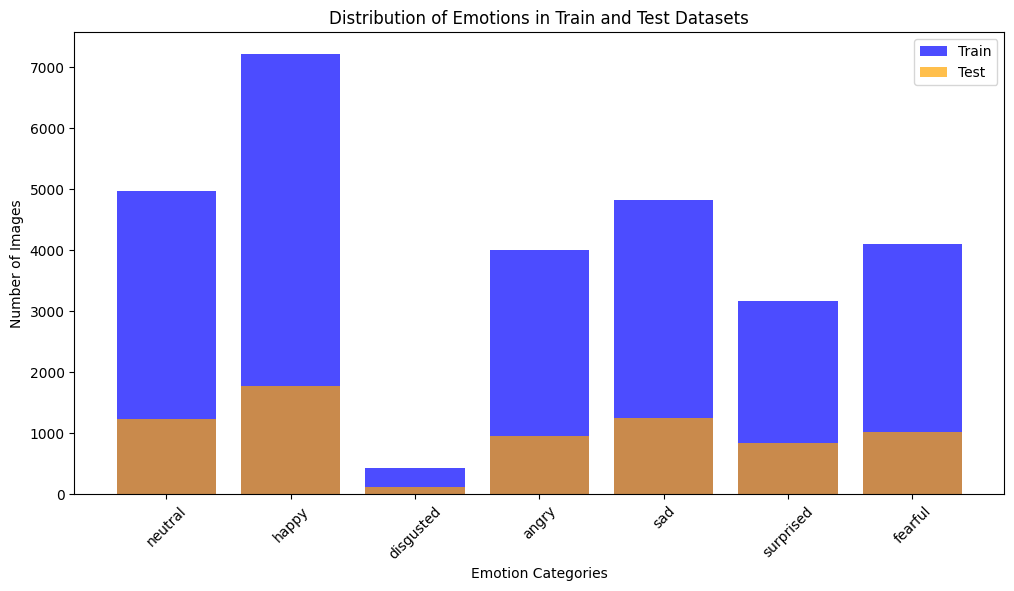

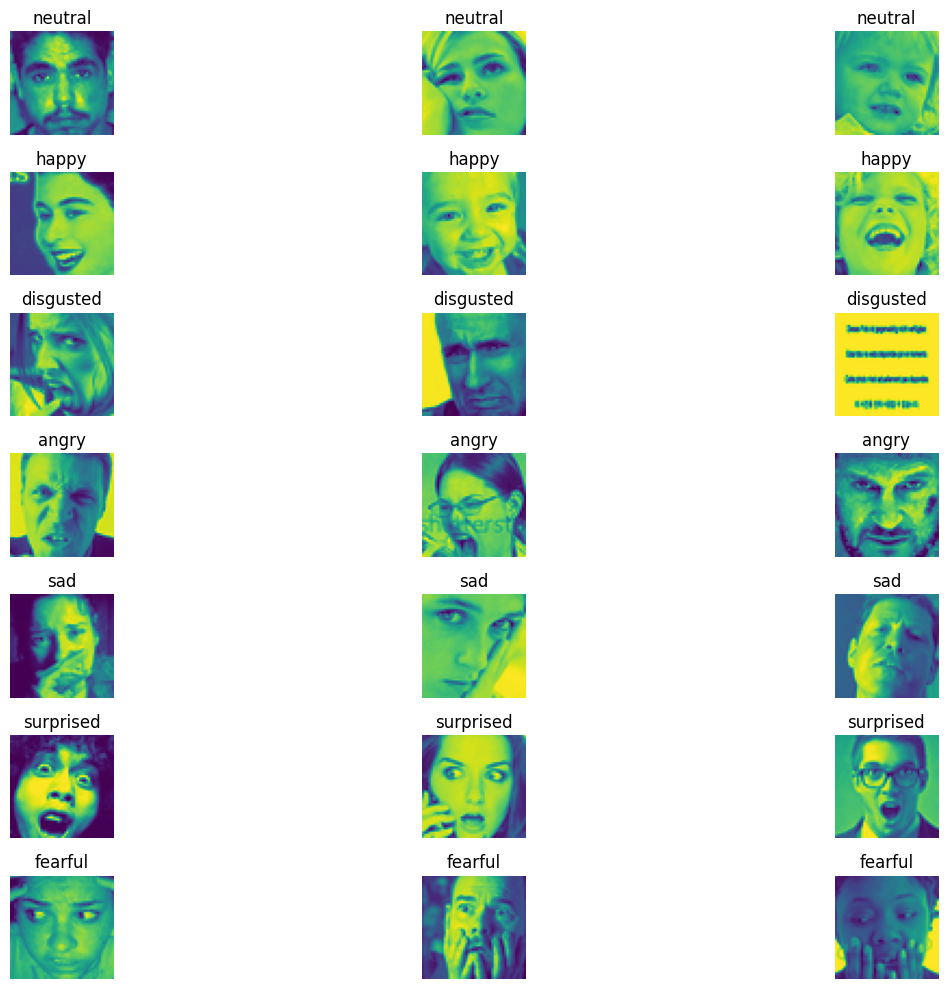

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Directory paths for train and test datasets
train_dir = "/content/train"
test_dir = "/content/test"

# Get the list of emotion categories
emotion_categories = os.listdir(train_dir)

# Analyze the distribution of different emotions
train_emotion_counts = {category: len(os.listdir(os.path.join(train_dir, category))) for category in emotion_categories}
test_emotion_counts = {category: len(os.listdir(os.path.join(test_dir, category))) for category in emotion_categories}

# Visualize the distribution of different emotions in the train and test datasets
plt.figure(figsize=(12, 6))
plt.bar(train_emotion_counts.keys(), train_emotion_counts.values(), color='blue', alpha=0.7, label='Train')
plt.bar(test_emotion_counts.keys(), test_emotion_counts.values(), color='orange', alpha=0.7, label='Test')
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Emotions in Train and Test Datasets')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Visualize sample images from each emotion category
num_samples_per_category = 3  # Number of sample images to display for each category

plt.figure(figsize=(15, 10))
for i, category in enumerate(emotion_categories, 1):
    category_dir = os.path.join(train_dir, category)
    image_files = os.listdir(category_dir)[:num_samples_per_category]
    for j, image_file in enumerate(image_files, 1):
        image_path = os.path.join(category_dir, image_file)
        image = Image.open(image_path)
        plt.subplot(len(emotion_categories), num_samples_per_category, (i - 1) * num_samples_per_category + j)
        plt.imshow(image)
        plt.title(category)
        plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_image_data_generator(directory, target_size=(224, 224), batch_size=32, mode='train', class_mode='categorical'):


  datagen = ImageDataGenerator(
      # Rescale pixel values to range 0-1
      rescale=1./255,
      # Convert images to grayscale (optional)
      grayscale=True if mode == 'train' else False,  # Only convert for training
      # Random transformations for training data augmentation (optional)
      rotation_range=20 if mode == 'train' else 0,
      width_shift_range=0.2 if mode == 'train' else 0,
      height_shift_range=0.2 if mode == 'train' else 0,
      horizontal_flip=True if mode == 'train' else False
  )

  # Flow data from directory based on mode
  if mode == 'train':
    return datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )
  else:
    return datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode,
        shuffle=False  # Don't shuffle test data
    )

In [9]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**VGG16**

In [12]:
# Step 4: Model Building
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
LR=0.001,
model.compile(optimizer=Adam(lr=LR), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
test_loss, test_accuracy = model.evaluate(test_generator)


225/225 [==============================] - 3s 15ms/step - loss: 1.4874 - accuracy: 0.4289


In [30]:
predictions = model.predict(test_generator)
y_true = test_generator.classes  # Use 'classes' instead of 'labels'
y_pred = np.argmax(predictions, axis=1)


225/225 [==============================] - 4s 19ms/step


In [31]:
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.17      0.08      0.11       958
           1       0.04      0.01      0.01       111
           2       0.14      0.10      0.11      1024
           3       0.25      0.37      0.30      1774
           4       0.17      0.18      0.18      1233
           5       0.16      0.16      0.16      1247
           6       0.10      0.10      0.10       831

    accuracy                           0.19      7178
   macro avg       0.15      0.14      0.14      7178
weighted avg       0.17      0.19      0.17      7178



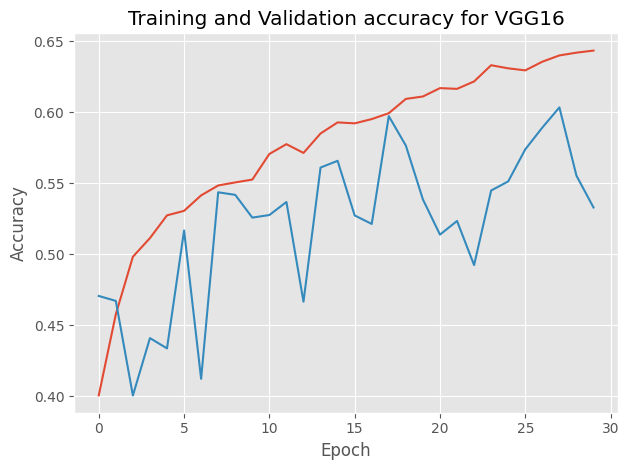

In [60]:
plt.style.use("ggplot")
plt.subplot(1,1,1)
plt.plot(history.history["accuracy"],label="train_acc")
plt.plot(history.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation accuracy for VGG16")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [62]:
model.evaluate(test_generator)
preds = model.predict(test_generator)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(test_generator.labels)

225/225 [==============================] - 3s 14ms/step


Text(0.5, 1.0, 'Confusion Matrix')

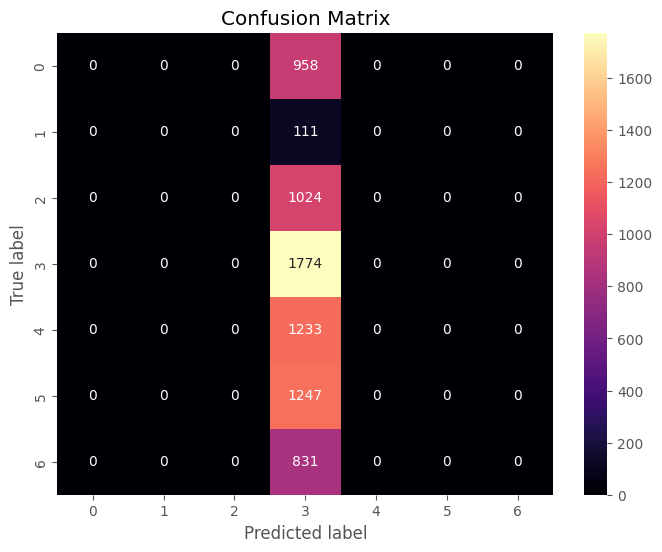

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

**ResNet50**

**EPOCH 15**

In [36]:
# Example code for improving model accuracy

# 1. Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

# 2. Define constants and hyperparameters
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32
LR = 0.001

# 3. Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 4. Define the model architecture
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 5. Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

# 7. Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# 8. Generate classification report
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

print(classification_report(y_true, y_pred))


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Epoch 1/15
898/898 [==============================] - 138s 80ms/step - loss: 1.7778 - accuracy: 0.3403 - val_loss: 1.7287 - val_accuracy: 0.3533
Epoch 2/15
898/898 [==============================] - 69s 77ms/step - loss: 1.4591 - accuracy: 0.4482 - val_loss: 1.3614 - val_accuracy: 0.4692
Epoch 3/15
898/898 [==============================] - 70s 77ms/step - loss: 1.3996 - accuracy: 0.4706 - val_loss: 1.6271 - val_accuracy: 0.3873
Epoch 4/15
898/898 [==============================] - 68s 75ms/step - loss: 1.4089 - accuracy: 0.4724 - val_loss: 1.5310 - val_accuracy: 0.4125
Epoch 5/15
898/898 [==============================] - 68s 76ms/step - loss: 1.3632 - accuracy: 0.4875 - val_loss: 1.7561 - val_accuracy: 0.4181
Epoch 6/15
898/898 [==============================] - 67s 75ms/step - loss: 1.4431 - accuracy: 0.4645 - val_loss: 1.2438 - val_accuracy: 0.5255
Epoch 7/15
898/898 [==============================] - 68s 76ms/step - loss: 1.3790 - accuracy: 0.4841 - val_loss: 1.2749 - val_accuracy

**EPOCH 30 for improved accuracy**

In [38]:
# Example code for improving model accuracy

# 1. Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

# 2. Define constants and hyperparameters
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32
LR = 0.001

# 3. Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 4. Define the model architecture
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 5. Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)

# 7. Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# 8. Generate classification report
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

print(classification_report(y_true, y_pred))


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Epoch 1/30
898/898 [==============================] - 98s 77ms/step - loss: 1.6662 - accuracy: 0.4006 - val_loss: 1.3918 - val_accuracy: 0.4706
Epoch 2/30
898/898 [==============================] - 69s 76ms/step - loss: 1.4393 - accuracy: 0.4577 - val_loss: 1.3781 - val_accuracy: 0.4671
Epoch 3/30
898/898 [==============================] - 69s 77ms/step - loss: 1.3335 - accuracy: 0.4982 - val_loss: 1.6262 - val_accuracy: 0.4005
Epoch 4/30
898/898 [==============================] - 69s 77ms/step - loss: 1.2984 - accuracy: 0.5113 - val_loss: 1.4235 - val_accuracy: 0.4409
Epoch 5/30
898/898 [==============================] - 71s 79ms/step - loss: 1.2578 - accuracy: 0.5274 - val_loss: 1.5339 - val_accuracy: 0.4337
Epoch 6/30
898/898 [==============================] - 70s 77ms/step - loss: 1.2458 - accuracy: 0.5305 - val_loss: 1.2497 - val_accuracy: 0.5167
Epoch 7/30
898/898 [==============================] - 72s 80ms/step - loss: 1.2140 - accuracy: 0.5414 - val_loss: 1.8793 - val_accuracy:

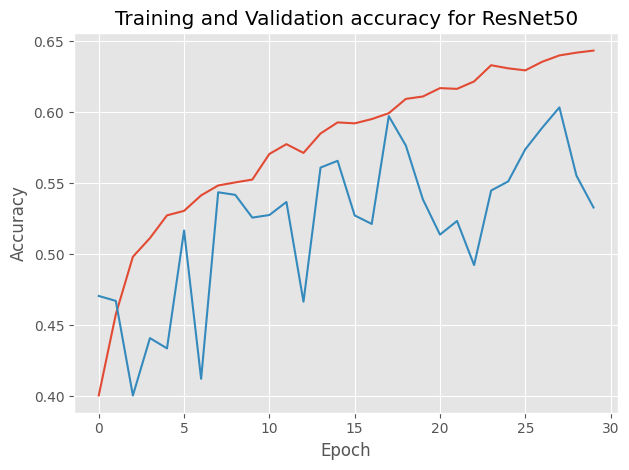

In [61]:
plt.style.use("ggplot")
plt.subplot(1,1,1)
plt.plot(history.history["accuracy"],label="train_acc")
plt.plot(history.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation accuracy for ResNet50")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [40]:
model.evaluate(test_generator)
preds = model.predict(test_generator)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(test_generator.labels)

225/225 [==============================] - 4s 16ms/step


Text(0.5, 1.0, 'Confusion Matrix')

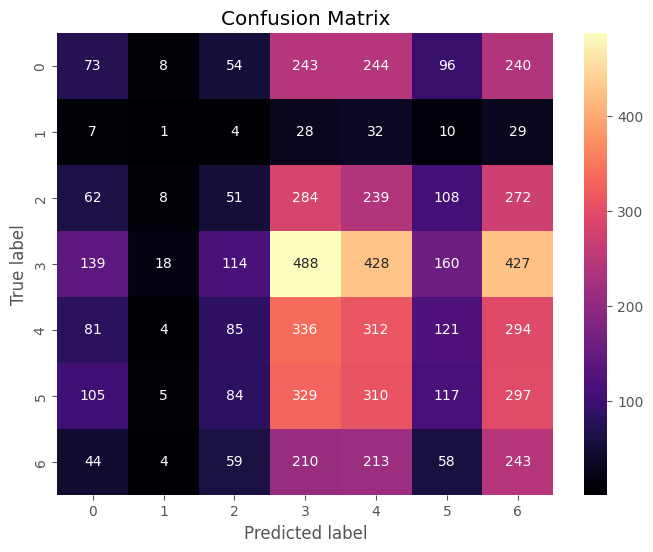

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')